In [135]:
from prettyprinter import pprint
import polars as pl
import asyncio
import httpx


In [ ]:
series_ids = [
    "STEO.RGDPQ_NONOECD.M",
    "STEO.RGDPQ_OECD.M",
    "STEO.PAPR_NONOPEC.M",
    "STEO.PAPR_OPEC.M",
    "STEO.PATC_OECD.M",
    "STEO.PATC_NON_OECD.M",
    "STEO.COPRPUS.M",
    "STEO.CORIPUS.M",
    "STEO.FOREX_WORLD.M",
    "STEO.PASC_OECD_T3.M",
    "STEO.COPS_OPEC.M",
    "STEO.COPC_OPEC.M",
    "STEO.T3_STCHANGE_OOECD.M",
    "STEO.T3_STCHANGE_NOECD.M"
]

X_Params = {
    "frequency": "monthly",
    "data": [
        "value"
    ],
    "facets": {},
    "start": "2000-01",
    "end": "2024-01",
    "sort": [
        {
            "column": "period",
            "direction": "desc"
        }
    ],
    "offset": 0,

}

API_KEY = "caGyhsgCC3brWOYqKDFMtPc16VPABFzHr3PIfHf7"

In [ ]:
async def fetch_eia_data(series_id: str, headers: dict = {}):
    url = f"https://api.eia.gov/v2/seriesid/{series_id}?api_key={API_KEY}"
    async with httpx.AsyncClient() as client:
        response = await client.get(url)
        response.raise_for_status()  
        return response.json()


async def get_all_data (list_of_series_id: list, headers: dict = {}):
    tasks = [fetch_eia_data(series_id, headers) for series_id in list_of_series_id]
    return await asyncio.gather(*tasks)


responses = await get_all_data(list_of_series_id=series_ids,headers=X_Params)
DATA = list(map(lambda x: pl.DataFrame(x['response']['data']), filter(lambda x: len(x['response']['data']), responses)))

In [ ]:
metadata = {
    "series_id": list(map(lambda x: x['seriesId'][0], DATA)),
    "description": list(map(lambda x: x['seriesDescription'][0], DATA)),
    "unit": list(map(lambda x: x['unit'][0], DATA)),
    "n_observations": list(map(lambda x: x.shape[0], DATA)),
    }


In [98]:
print(pl.DataFrame(metadata).to_pandas().to_markdown(index=False))

| series_id         | description                                                             | unit                           |   n_observations |
|:------------------|:------------------------------------------------------------------------|:-------------------------------|-----------------:|
| PAPR_NONOPEC      | Total non-OPEC Liquids Petroleum Production                             | million barrels per day        |              396 |
| PAPR_OPEC         | Total OPEC Petroleum Supply                                             | million barrels per day        |              396 |
| PATC_OECD         | Liquid Fuels Consumption, Total OECD                                    | million barrels per day        |              432 |
| PATC_NON_OECD     | Liquid Fuels Consumption, Total non-OECD                                | million barrels per day        |              432 |
| COPRPUS           | U.S. Crude Oil Production                                               | million barrels 

In [ ]:
import pickle
with open("DATA.pkl", "wb") as f:
    pickle.dump(list(map(lambda x: x.to_pandas(), DATA)), f)

c:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

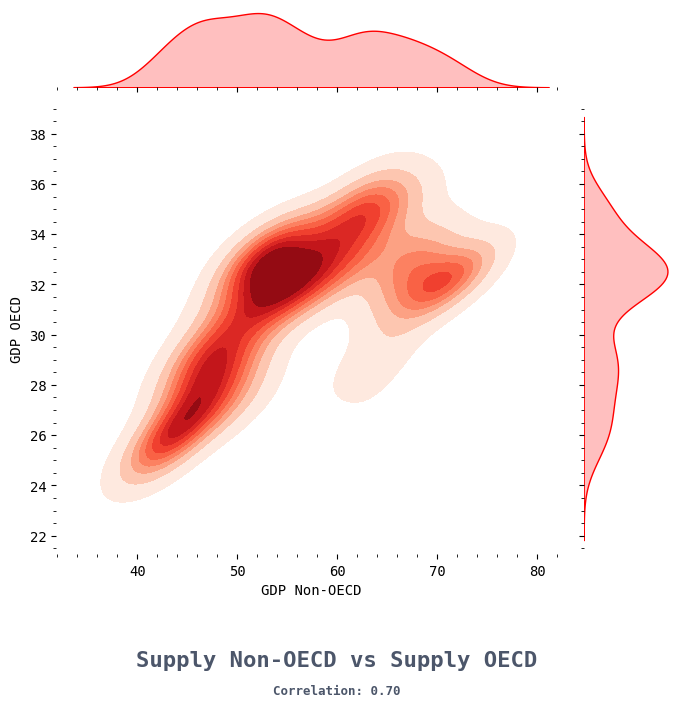

c:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

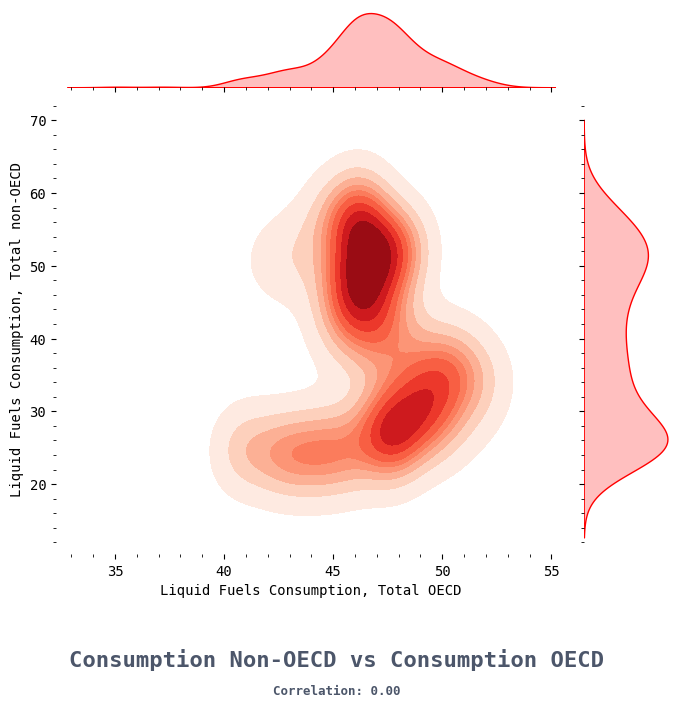

In [134]:

# First plot
multivariate_density(x=DATA[0]["value"], y=DATA[1]["value"], 
                     x_label="GDP Non-OECD", y_label="GDP OECD", title="Supply Non-OECD vs Supply OECD")

# Second plot
multivariate_density(x=DATA[2]["value"], y=DATA[3]["value"], 
                     x_label=metadata['description'][2], y_label=metadata['description'][3], title="Consumption Non-OECD vs Consumption OECD")


